In [11]:
from chxanalys.chx_packages import *
%matplotlib notebook

plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
from chxanalys.chx_xpcs_xsvs_jupyter_V1 import *
from chxanalys.XPCS_SAXS import circular_average

from skbeam.core import roi

In [790]:
gm = twoD_Gaussian([200,200], 25)
cm = get_circle_mask( r= 90, bx= 200)
trm= get_triangle_mask(bx=200, l = 160)
#show_img(g)
#show_img(trm)

In [64]:
%run Analysis/Simulation_XPCS/xpcs_sim.py

# Initalize the position

In [218]:
 

ed = 0.15 #edge fraction, in this case [40, 360]
bx = 800 #box size
num = 16 #particle number = num *num
N=  500  #how many frames
size=6 # each particle size
center=[ bx//2,bx//2]

amp= .5  #each step move amplitude


#from pixel to q, q= pixel/54.6

In [195]:
px = np.random.uniform( ed, 1-ed, (num, num) ) * bx
py = np.random.uniform( ed, 1-ed, (num, num) ) * bx      

In [196]:
px,py = get_random_motion_2D_points( px, py, amp = 3, rmin=24, try_max=10000, )

In [205]:
img =  place_shape_on_pxy( px,py, size= size,  bx= bx, by=None, shape='c' )

<IPython.core.display.Javascript object>


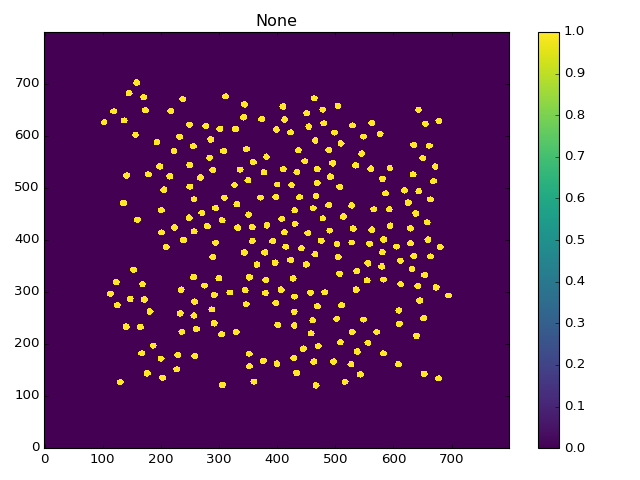

In [206]:
show_img(img)

In [ ]:
ftimage = np.fft.fft2(img)
ftimage = np.fft.fftshift(ftimage)
fimg = (np.abs(ftimage))**2

mask = create_cross_mask(  fimg, center= center,
                            wy_left= 4, wy_right= 4, 
                              wx_up= 4, wx_down=4,center_radius= 4 )

qp, iq = circular_average( fimg, 
        calibrated_center=center, threshold=0, nx=None, 
                          pixel_size=(1,1), mask=mask, min_x= None, max_x= None)

108.66666666666667


<IPython.core.display.Javascript object>


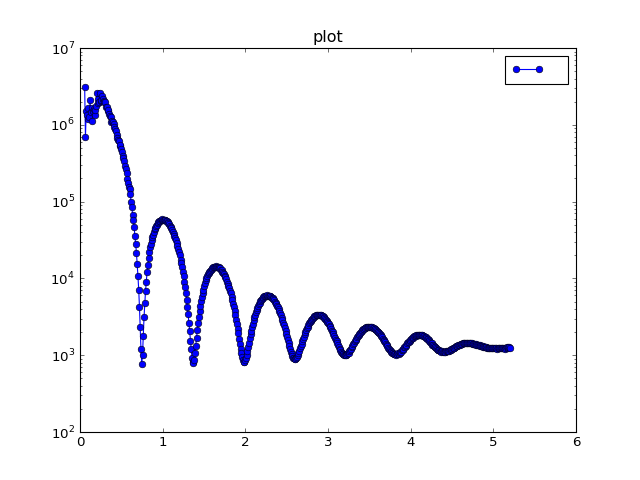

In [239]:
kq =  81.5*12/9 
print(kq)
plot1D(iq, qp/kq, c='b', m='o',logy=True)

# Start from here

In [214]:
data_dir0 = 'Analysis/Simulation_XPCS/Results/'

In [215]:
np.save( data_dir0 + 'init_pxy_256_in800', [px,py])
np.save( data_dir0 + 'init_pxy', [px,py])

In [216]:
px,py = np.load( data_dir0 + 'init_pxy.npy' )

In [217]:
setup_pargs = {'Ldet': 1,
 'center': center,
 'dpix': 1,
 'exposuretime': 1,
 'lambda_': 1,
 'path': 'Analysis/Simulation_XPCS/Results/',
 'timeperframe': 1,
 'uid': 'uid'}

In [220]:
 

ed = 0.15 #edge fraction, in this case [40, 360]
bx = 800 #box size
num = 16 #particle number = num *num
N=  500  #how many frames
size=6 # each particle size
center=[ bx//2,bx//2]

amp= .5  #each step move amplitude


#from pixel to q, q= /108.6  pixel/54.6  

In [221]:
%run Analysis/Simulation_XPCS/xpcs_sim.py

<IPython.core.display.Javascript object>


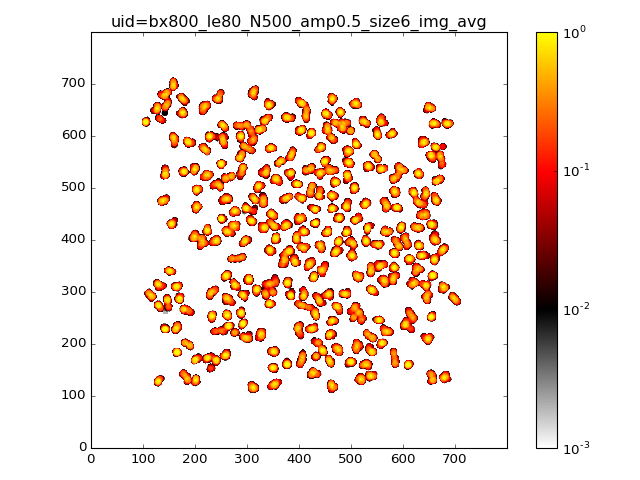

In [222]:
#uid = 'bx%s_le%s_N%s_amp%s_size%s'%(bx,le,N,amp,size)

uid = 'L%sE%sN%sA%sS%s'%(bx,le,N,amp,size)
data_dir = os.path.join(data_dir0, '%s/'%uid)
os.makedirs(data_dir, exist_ok=True)

uidstr = uid

filename = 'Analysis/Simulation_XPCS/Sim_Data/sim_data_%s.cmp'%uid
#if os.exist_ok
if not os.path.isfile(  filename  ):
    px,py = np.load( data_dir0 + 'init_pxy.npy' )
    imgs = get_real_obj( px,py, bx=bx, N=N, amp=amp, size=size, rmin=14, try_max=5000)
    imgsa = np.average(imgs, axis=0)
    #show_img( imgs[999] )
    show_img( imgsa, vmin=.001,  logs=True, aspect=1,
       image_name= uidstr + '_img_avg',  save=True, path=data_dir,  cmap = cmap_albula )
    

    fimgs = get_recp_sca( imgs)
    mask = create_cross_mask(  fimg, center= center,
                            wy_left= 4, wy_right= 4, 
                              wx_up= 4, wx_down=4,center_radius= 4 )



    md={'uid':uid}
    md['beam_center_x'],md['beam_center_y'], md['count_time'], md['detector_distance'] = bx//2,bx//2,1,1
    md['frame_time'],md['incident_wavelength'], md['x_pixel_size'],md['y_pixel_size'] = 1, 1, 1,1
    md['pixel_mask'] = mask

else:
    fimgs = 'dumy'
    mask='dumy'
    md='dumy'    

In [228]:
force_compress=  False   
mask, avg_img, imgsum, bad_frame_list = compress_eigerdata(fimgs, mask, md, filename, 
         force_compress= force_compress,  para_compress= False,  bad_pixel_threshold = 1e14,
                bins=1, num_sub= 100, num_max_para_process= 500, with_pickle=True  )
min_inten = 10 
good_start = 0    

  0%|          | 0/500 [00:00<?, ?it/s]

Create a new compress file with filename as :Analysis/Simulation_XPCS/Sim_Data/sim_data_bx800_le80_N500_amp0.5_size6.cmp.


100%|██████████| 500/500 [01:22<00:00,  7.17it/s]


The fraction of pixel occupied by photon is 98.010% 
No bad frames are involved.


L800E80N500A0.5S6_fra_0_500


<IPython.core.display.Javascript object>


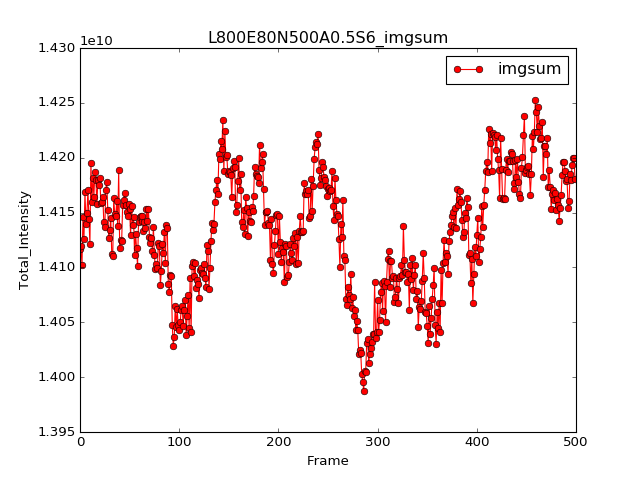

<IPython.core.display.Javascript object>


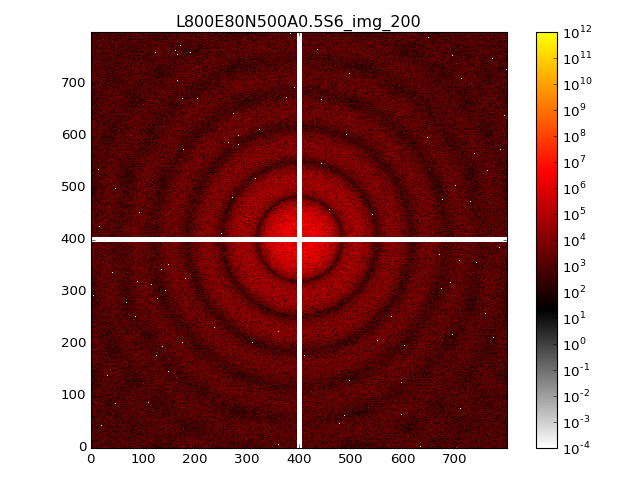

<IPython.core.display.Javascript object>


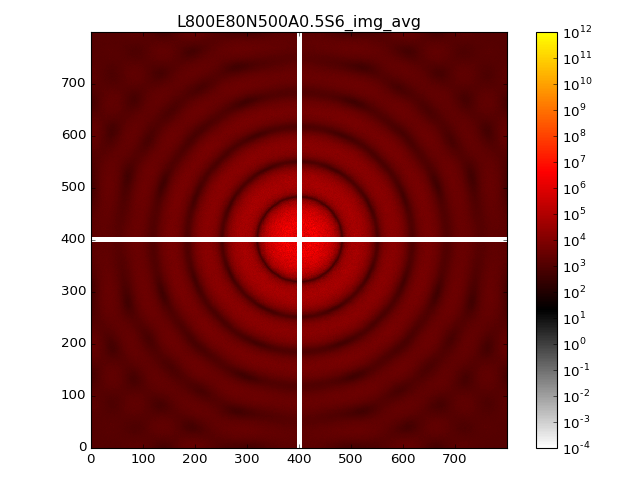

<IPython.core.display.Javascript object>


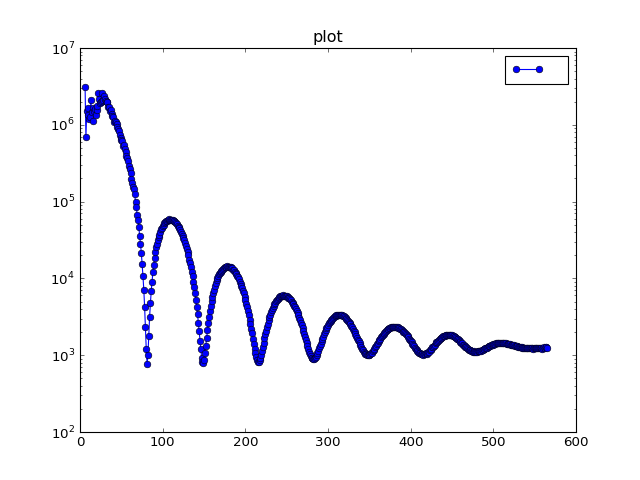

In [285]:
FD = Multifile(filename, good_start, N )
#FD = Multifile(filename, good_start, 100)
uid_ = uidstr + '_fra_%s_%s'%(FD.beg, FD.end)
print( uid_ )
plot1D( y = imgsum[ np.array( [i for i in np.arange(good_start, len(imgsum)) if i not in bad_frame_list])],
      m='o', c='r', title =uidstr + '_imgsum', xlabel='Frame', ylabel='Total_Intensity', legend='imgsum'   )

show_img( FD.rdframe(200)*mask,  vmin=.0001, vmax= 1e12, logs=True, aspect=1, #save_format='tif',
     image_name= uidstr + '_img_200',  save=True, path=data_dir,  cmap = cmap_albula )

show_img( avg_img,  vmin=.0001, vmax= 1e12, logs=True, aspect=1, #save_format='tif',
     image_name= uidstr + '_img_avg',  save=True, path=data_dir,  cmap = cmap_albula )

qp, iq = circular_average(avg_img, 
    calibrated_center=[ bx//2, bx//2], threshold=0, nx=None, 
                      pixel_size=(1,1), mask=mask, min_x= None, max_x= None)

plot1D(iq, qp, c='b', m='o',logy=True, save=True, path= data_dir)

setup_pargs =  {'Ldet': 1,
 'center': center,
 'dpix': 1,
 'exposuretime': 1,
 'lambda_': 1,
 'path': data_dir,
 'timeperframe':1,
 'uid': 'uid'}



26.5
16


<IPython.core.display.Javascript object>


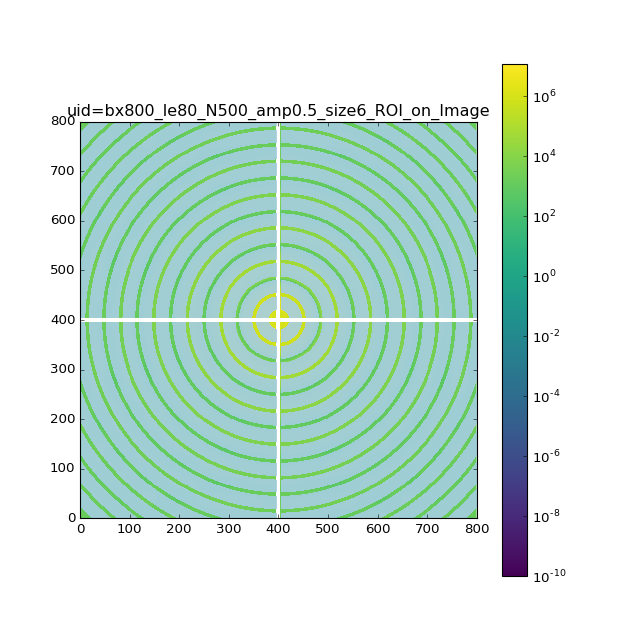

<IPython.core.display.Javascript object>


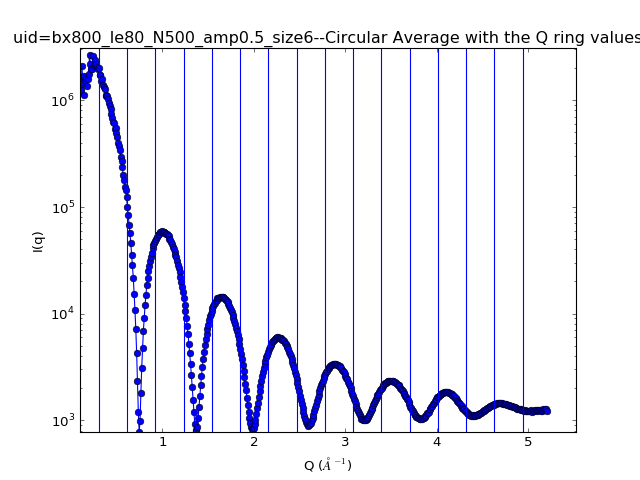

In [264]:
    if True:
        inner_radius= 20 #10
        outer_radius = 550 #90
        num_rings = 16  #72
        gap_ring_number = 4
        width =    ( outer_radius - inner_radius)/(num_rings + gap_ring_number)
        print(width)
        edges = None


    if False:    
        width = 10  
        number_rings= 1         
        qcenters = [ 20, 32, 54, 88, 122, 157, 188, 221 ]

        edges = get_non_uniform_edges(  qcenters, width,   number_rings = number_rings )    
        inner_radius= None
        outer_radius = None
        width = None
        num_rings = None             

    
    roi_mask, qr, qr_edge = get_ring_mask2(  mask, inner_radius=inner_radius, 
            outer_radius = outer_radius , width = width, num_rings = num_rings, edges=edges,
                          unit='pixel',  center=center,     pargs=setup_pargs   )

    qind, pixelist = roi.extract_label_indices(  roi_mask  ) 
    qr = np.round( qr, 5)/kq
    print(len(qr))
    show_ROI_on_image( avg_img, roi_mask, center, label_on = False, rwidth = 400, alpha=.9,  
                     save=True, path=data_dir, uid=uidstr, vmin= np.min(avg_img), vmax= np.max(avg_img),
                     aspect=1) 
    
    qval_dict = get_qval_dict( np.round(qr, 5)  ) 

    plot_qIq_with_ROI( qp/kq, iq, qr, logs=True, uid=uidstr, xlim=[0.1,600/kq],
                      ylim = [iq.min(), iq.max()],  save=True, path=data_dir)


In [265]:
2*np.pi/qr

array([ 20.5345204 ,  10.21859969,   6.80165525,   5.09722138,
         4.0758499 ,   3.39547193,   2.90974985,   2.54560167,
         2.2624603 ,   2.03600061,   1.85075075,   1.6964002 ,
         1.5658131 ,   1.45389388,   1.35690664,   1.27204994])

<IPython.core.display.Javascript object>


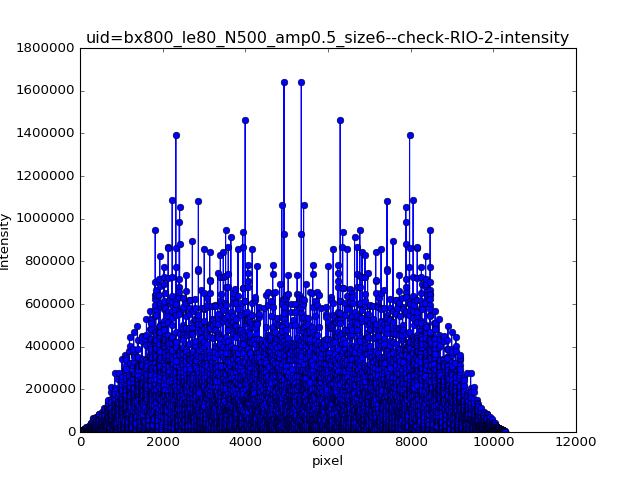

Get waterfall for q index=1: 100%|██████████| 500/500 [00:05<00:00, 88.45it/s] 


<IPython.core.display.Javascript object>


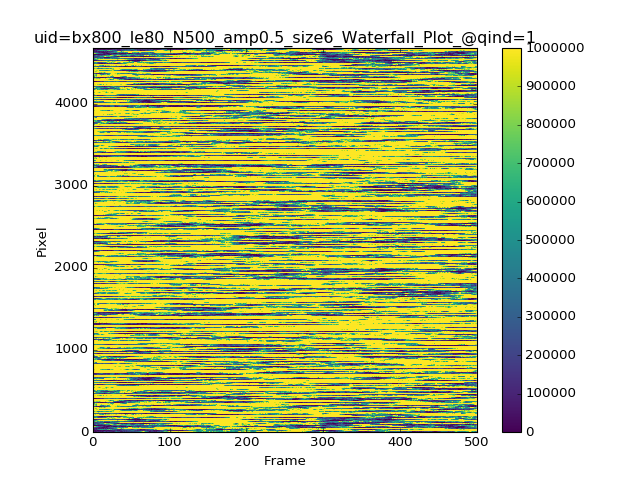

In [266]:
    qind, pixelist = roi.extract_label_indices(roi_mask)
    noqs = len(np.unique(qind))

    nopr = np.bincount(qind, minlength=(noqs+1))[1:]   

    roi_inten = check_ROI_intensity( avg_img, roi_mask, ring_number= 2, uid =uidstr )

    qth_interest = 1

    wat = cal_waterfallc( FD, roi_mask, qindex= qth_interest, save =True, path=data_dir, uid=uidstr)

    plot_waterfallc( wat, qth_interest, aspect=None, vmax= 1e6, uid=uidstr, save =True, 
                            path=data_dir, beg= FD.beg)


In [267]:
    use_sqnorm = True
    use_imgsum_norm =True

    if use_sqnorm:norm = get_pixelist_interp_iq( qp, iq, roi_mask, center)
    else:norm=None 
    if use_imgsum_norm:imgsum_ = imgsum
    else:imgsum_ = None    
    import time

    t0 = time.time()    
    g2, lag_steps  = cal_g2p( FD,  roi_mask, bad_frame_list,good_start, num_buf = 8, num_lev= None,
                            imgsum= imgsum_, norm=norm )
    run_time(t0)

In this g2 calculation, the buf and lev number are: 8--8--
501 frames will be processed...


  0%|          | 0/16 [00:00<?, ?it/s]

Starting assign the tasks...
Starting running the tasks...


100%|██████████| 16/16 [00:10<00:00,  1.56it/s]

G2 calculation DONE!
Total time: 14.018 sec


In [269]:
qr

array([ 0.3059816 ,  0.61487733,  0.92377298,  1.23266871,  1.54156445,
        1.85046009,  2.15935583,  2.46825156,  2.77714721,  3.08604294,
        3.39493868,  3.70383433,  4.01273006,  4.3216258 ,  4.63052144,
        4.93941718])

In [272]:
2*np.pi/qr

array([ 20.5345204 ,  10.21859969,   6.80165525,   5.09722138,
         4.0758499 ,   3.39547193,   2.90974985,   2.54560167,
         2.2624603 ,   2.03600061,   1.85075075,   1.6964002 ,
         1.5658131 ,   1.45389388,   1.35690664,   1.27204994])

In [ ]:
timeperframe =1
fit_g2_func = 'stretched'

lag_steps = lag_steps[:g2.shape[0]]
taus = lag_steps * timeperframe    
g2_pds = save_g2_general( g2, taus=taus,qr=np.array( list( qval_dict.values() ) )[:,0],
                         uid=uid_+'_g2.csv', path= data_dir, return_res=True )

g2_fit_result, taus_fit, g2_fit = get_g2_fit_general( g2,  taus, 
            function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
        fit_variables={'baseline':True, 'beta': True, 'alpha':False,'relaxation_rate':True},                                  
        guess_values={'baseline':1.0,'beta': 1,'alpha':1.0,'relaxation_rate':1,},
        guess_limits = dict( baseline =[.9, 1.2], alpha=[0, 2],
                    beta = [0, 2], relaxation_rate= [0.001, 5000]),
                                                    sequential_fit= True ) 
g2_fit_paras = save_g2_fit_para_tocsv(g2_fit_result,  filename= uid_  +'_g2_fit_paras.csv', path=data_dir ) 

The correlation function is saved in Analysis/Simulation_XPCS/Results/bx800_le80_N500_amp0.5_size6/ with filename as uid=bx800_le80_N500_amp0.5_size6_fra_0_500_g2.csv
The g2 fitting parameters are saved in Analysis/Simulation_XPCS/Results/bx800_le80_N500_amp0.5_size6/uid=bx800_le80_N500_amp0.5_size6_fra_0_500_g2_fit_paras.csv


<IPython.core.display.Javascript object>


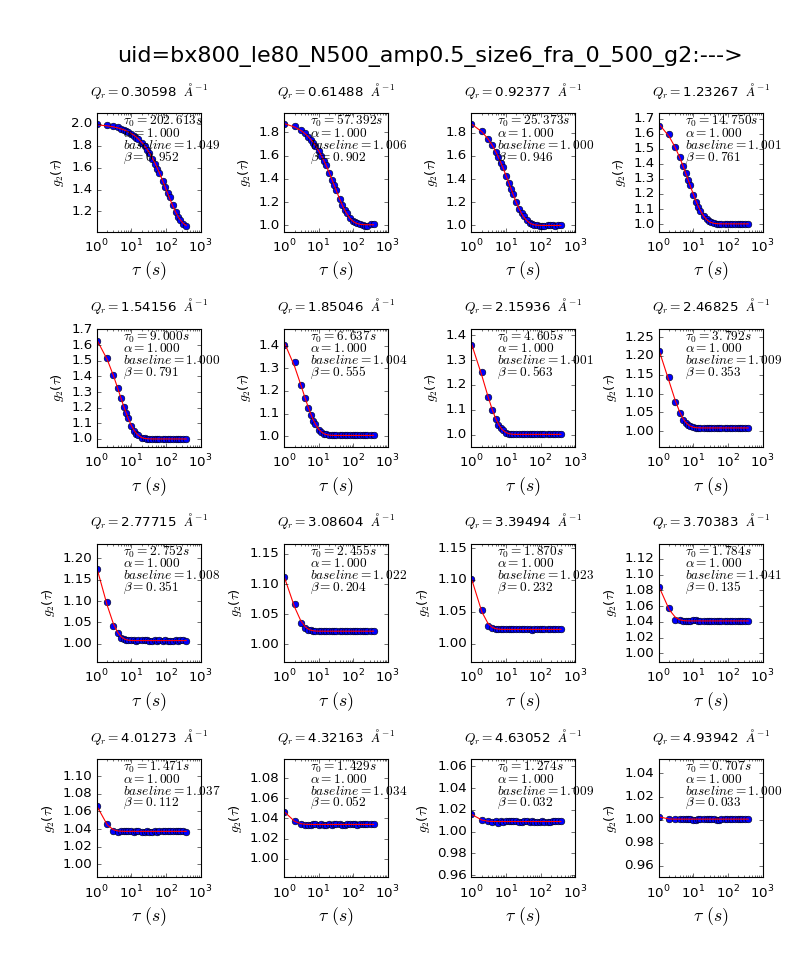

In [270]:
scat_geometry ='saxs'
plot_g2_general( g2_dict={1:g2, 2:g2_fit}, taus_dict={1:taus, 2:taus_fit},vlim=[0.95, 1.05],
                qval_dict = qval_dict, fit_res= g2_fit_result,  geometry= scat_geometry,filename= uid_+'_g2', 
                    path= data_dir, function= fit_g2_func,  ylabel='g2', append_name=  '_fit')

The fitted diffusion coefficient D0 is:  4.373e-02   A^2S-1


<IPython.core.display.Javascript object>


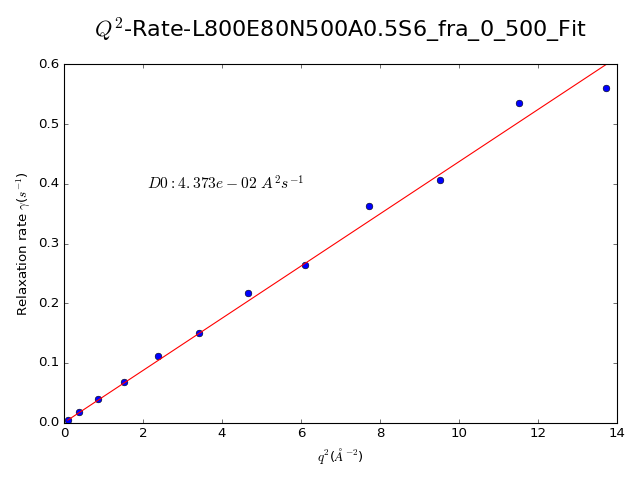

In [286]:
fs,fe=0, 12
qval_dict_ = {k:qval_dict[k] for k in list(qval_dict.keys())[fs:fe]  }
D0, qrate_fit_res = get_q_rate_fit_general(  qval_dict_, g2_fit_paras['relaxation_rate'][fs:fe], geometry= scat_geometry )
plot_q_rate_fit_general( qval_dict_, g2_fit_paras['relaxation_rate'][fs:fe],  qrate_fit_res, 
                        geometry= scat_geometry,uid=uid_  , path= data_dir )

In [274]:
run_two_time = True

if run_two_time:

    data_pixel =   Get_Pixel_Arrayc( FD, pixelist,  norm= norm ).get_data()
    g12b = auto_two_Arrayc(  data_pixel,  roi_mask, index = None   )

100%|██████████| 16/16 [00:03<00:00,  5.20it/s]


<IPython.core.display.Javascript object>


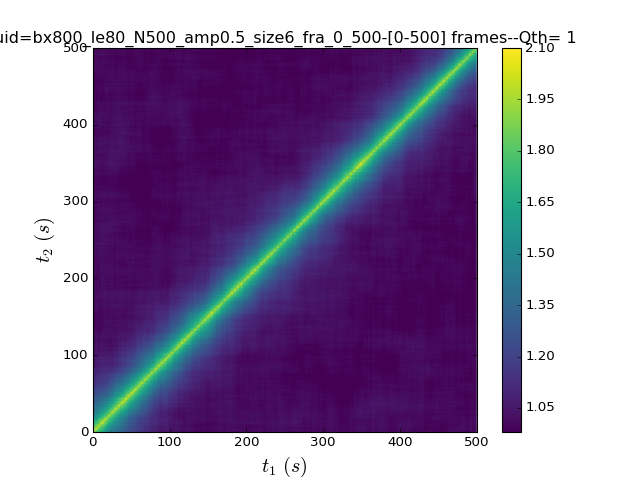

In [275]:
show_C12(g12b, q_ind= 1, N1= FD.beg,logs=False, N2=min( FD.end,5000), vmin= 0.98, vmax=2.1, 
                 timeperframe=timeperframe,save=True, path= data_dir, uid = uid_ ) 

In [276]:

Nimg  = len(fimgs)
multi_tau_steps = True
if run_two_time:
    if lag_steps is None:
        num_bufs=8
        noframes = FD.end - FD.beg
        num_levels = int(np.log( noframes/(num_bufs-1))/np.log(2) +1) +1
        tot_channels, lag_steps, dict_lag = multi_tau_lags(num_levels, num_bufs)
        max_taus= lag_steps.max()

    #max_taus= lag_steps.max()  
    max_taus = Nimg    
    t0=time.time()
    #tausb = np.arange( g2b.shape[0])[:max_taus] *timeperframe
    if multi_tau_steps:
        lag_steps_ = lag_steps[   lag_steps <= g12b.shape[0] ]
        g2b = get_one_time_from_two_time(g12b)[lag_steps_]
        tausb = lag_steps_ *timeperframe
    else:
        tausb = (np.arange( g12b.shape[0]) *timeperframe)[:-200]
        g2b = (get_one_time_from_two_time(g12b))[:-200]
    run_time(t0)

    g2b_pds = save_g2_general( g2b, taus=tausb, qr= np.array( list( qval_dict.values() ) )[:,0],
                              qz=None, uid=uid_ +'_g2b.csv', path= data_dir, return_res=True )

Total time: 0.088 sec
The correlation function is saved in Analysis/Simulation_XPCS/Results/bx800_le80_N500_amp0.5_size6/ with filename as uid=bx800_le80_N500_amp0.5_size6_fra_0_500_g2b.csv


In [277]:
if run_two_time:

    g2b_fit_result, tausb_fit, g2b_fit = get_g2_fit_general( g2b,  tausb, 
                function = fit_g2_func,  vlim=[0.95, 1.05], fit_range= None,  
            fit_variables={'baseline':True, 'beta': True, 'alpha':False,'relaxation_rate':True},                                  
            guess_values={'baseline':1.0,'beta': 1,'alpha':1.0,'relaxation_rate':1,},
            guess_limits = dict( baseline =[0.9, 1.2], alpha=[0, 2],
                        beta = [0, 2], relaxation_rate= [0.001, 5000]),sequential_fit= True  ) 
    g2b_fit_paras = save_g2_fit_para_tocsv(g2b_fit_result,  filename= uid_  +'_g2b_fit_paras.csv', path=data_dir )

The g2 fitting parameters are saved in Analysis/Simulation_XPCS/Results/bx800_le80_N500_amp0.5_size6/uid=bx800_le80_N500_amp0.5_size6_fra_0_500_g2b_fit_paras.csv


In [134]:
%run chxanalys_link/chxanalys/chx_generic_functions.py

<IPython.core.display.Javascript object>


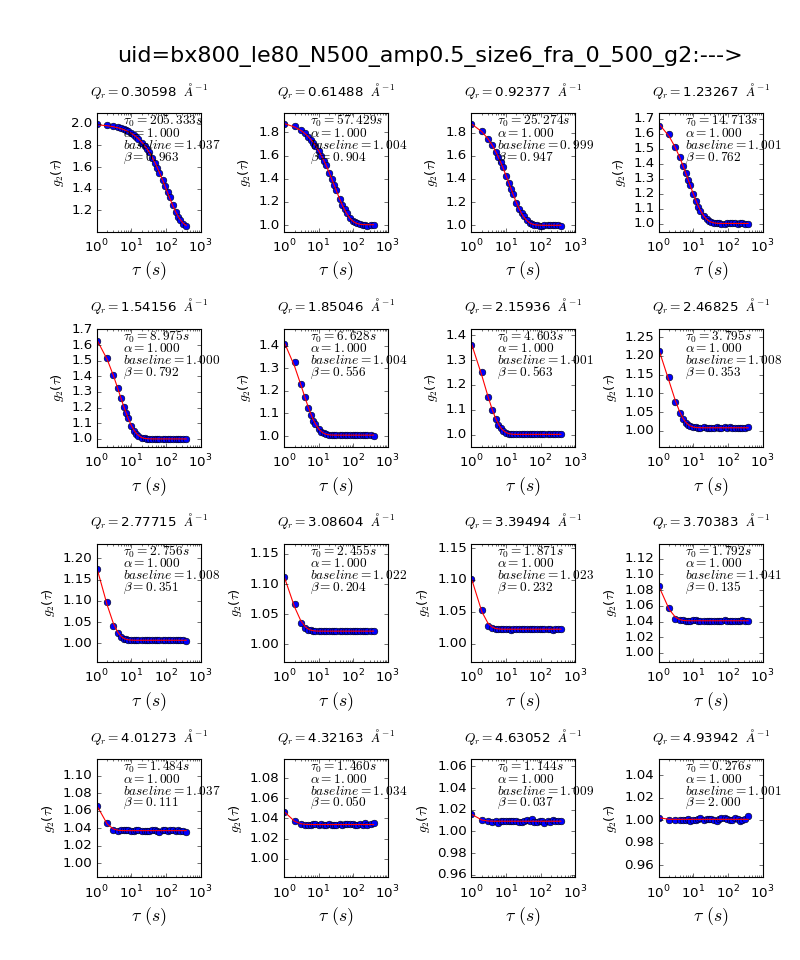

In [278]:
if run_two_time:
    plot_g2_general( g2_dict={1:g2b, 2:g2b_fit}, taus_dict={1:tausb, 2:tausb_fit}, vlim=[0.95, 1.05],
                qval_dict=qval_dict, fit_res= g2b_fit_result,  geometry=scat_geometry,filename=uid_+'_g2', 
                    path= data_dir, function= fit_g2_func,  ylabel='g2', append_name=  '_b_fit')

The fitted diffusion coefficient D0 is:  4.365e-02   A^2S-1


<IPython.core.display.Javascript object>


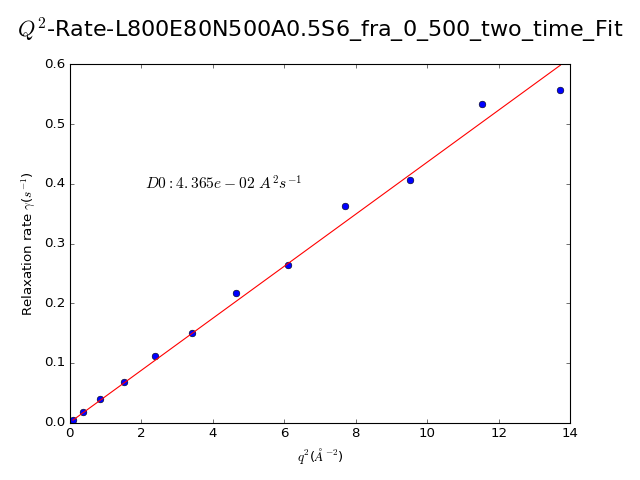

In [287]:
fs, fe = 0,12
qval_dict_ = {k:qval_dict[k] for k in list(qval_dict.keys())[fs:fe]  }
D0b, qrate_fit_resb = get_q_rate_fit_general(  qval_dict_, g2b_fit_paras['relaxation_rate'][fs:fe], geometry= scat_geometry )
plot_q_rate_fit_general( qval_dict_, g2b_fit_paras['relaxation_rate'][fs:fe],  qrate_fit_resb, 
                    geometry= scat_geometry,uid=uid_ +'_two_time' , path= data_dir )

<IPython.core.display.Javascript object>


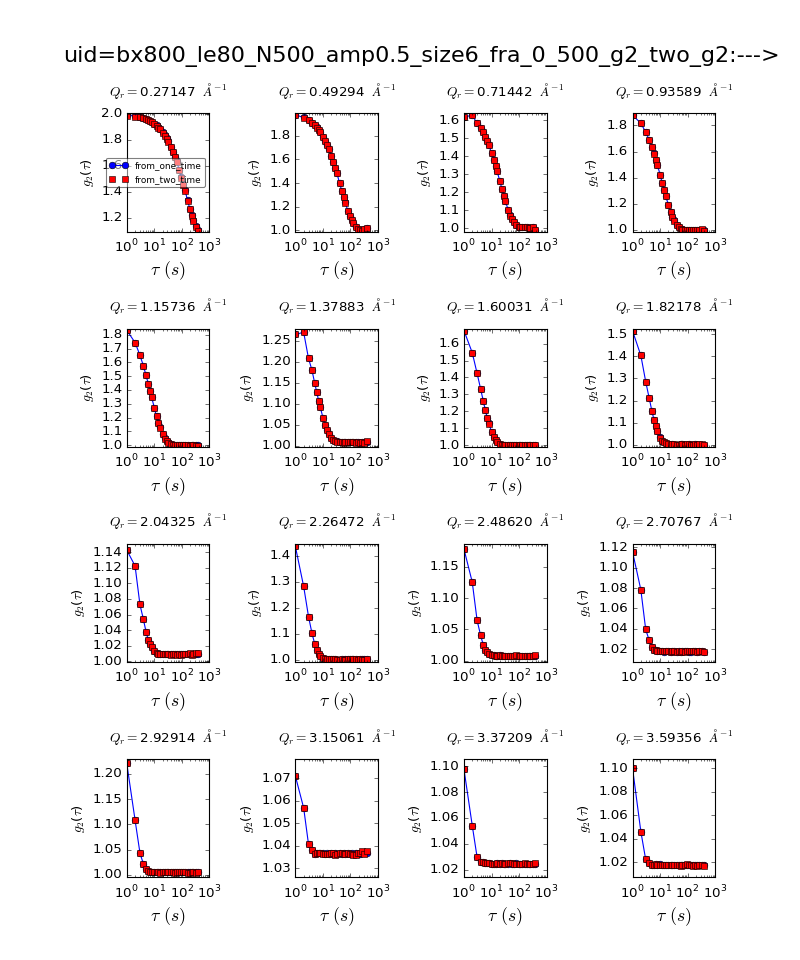

In [260]:
plot_g2_general( g2_dict={1:g2, 2:g2b}, taus_dict={1:taus, 2:tausb},vlim=[0.99, 1.007],
                qval_dict=qval_dict, g2_labels=['from_one_time', 'from_two_time'],
            geometry=scat_geometry,filename=uid_+'_g2_two_g2', path= data_dir, ylabel='g2', )